# Análisis exploratorio de precios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
# Función para realizar un gráfico de caja (el cual muestra el máximo, mínimo, mediana, cuartiles y outliers)

def boxplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    medianprops = dict(linestyle='-', linewidth=4, color='k')
    plot= datos.plot(kind='box',figsize=tamanio,fontsize=18,color=color,medianprops=medianprops)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [3]:
#Función para realizar un gráfico de barras horizontales con datos de series

def hbarplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18,color=color)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)
    plot.margins(x=0.1)
    for index,item in enumerate(plot.patches):
        plot.text(item.get_width()+.3,item.get_y()+.1,str(datos.iloc[index]),fontsize=15)

In [4]:
#Función para realizar un gráfico de barras verticales con datos de series

def barplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='bar',figsize=tamanio,fontsize=18,color=color)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plt.xticks(rotation='horizontal')
    plot.set_ylabel(etiqueta_y,fontSize=18)
    plot.margins(x=0.1)
    for index,item in enumerate(plot.patches):
        plot.text(item.get_x()-.03, item.get_height()+.5,str(datos.iloc[index]),fontsize=15)

In [5]:
#Función para realizar un histograma con datos de series

def hist(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='hist',figsize=tamanio,fontsize=18,color=color,bins=80)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    #plt.xticks(rotation='horizontal')
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [6]:
#Función para realizar un gráfico de barras horizontales con datos de dataframe

def hbarplotdf(datos,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [7]:
#Función para realizar un gráfico de barras verticales con datos de series

def barplotdf(datos,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='bar',figsize=tamanio,fontsize=18)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plt.xticks(rotation='horizontal')
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [8]:
# Importamos librerías de análisis de datos
dataframe = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

//## Análisis del precio a lo largo del tiempo

In [9]:
#precioenero2012=dataframe.loc[(dataframe['fecha']<'2012-02-01'),['fecha','precio']]
#precioenero2012
#>
#dataframe.loc[:,['fecha','precio']]
#precioenero2012.plot(x='fecha',y='precio',figsize=(15,15))

## Análisis del precio a lo largo de los años

In [9]:
dataframe['anio']=dataframe['fecha'].dt.year
dataframe.loc[:,['fecha','anio','precio']]
dataframe.loc[:,['anio','precio']]
anio_2012=dataframe[dataframe['anio']==2012]
anio_2013=dataframe[dataframe['anio']==2013]
anio_2014=dataframe[dataframe['anio']==2014]
anio_2015=dataframe[dataframe['anio']==2015]
anio_2016=dataframe[dataframe['anio']==2016]

In [20]:
#anio_2012['precio'].describe()

In [21]:
#anio_2013['precio'].describe()

In [22]:
#anio_2014['precio'].describe()

In [23]:
#anio_2015['precio'].describe()

In [24]:
#anio_2016['precio'].describe()

In [10]:
precios = pd.DataFrame(columns=['precio 2012','precio 2013','precio 2014','precio 2015','precio 2016'], index=['count','mean','std','min','25%','50%','75%','max'])
precios['precio 2012']=anio_2012['precio'].describe()
precios['precio 2013']=anio_2013['precio'].describe()
precios['precio 2014']=anio_2014['precio'].describe()
precios['precio 2015']=anio_2015['precio'].describe()
precios['precio 2016']=anio_2016['precio'].describe()
precios

,precio 2012,precio 2013,precio 2014,precio 2015,precio 2016
count,2.353400e+04,3.038600e+04,4.057200e+04,5.147000e+04,9.403800e+04
mean,2.032518e+06,2.125061e+06,2.364595e+06,2.634570e+06,2.801614e+06
std,1.780547e+06,1.847613e+06,1.980807e+06,2.189049e+06,2.325302e+06
min,3.100000e+05,3.100000e+05,3.100000e+05,3.100000e+05,3.100000e+05
25%,7.600000e+05,7.870125e+05,9.200000e+05,1.050000e+06,1.100000e+06
50%,1.463200e+06,1.520000e+06,1.780000e+06,1.950000e+06,2.100000e+06
75%,2.700000e+06,2.850000e+06,3.140000e+06,3.500000e+06,3.709973e+06
max,1.250000e+07,1.250000e+07,1.251500e+07,1.252500e+07,1.252100e+07


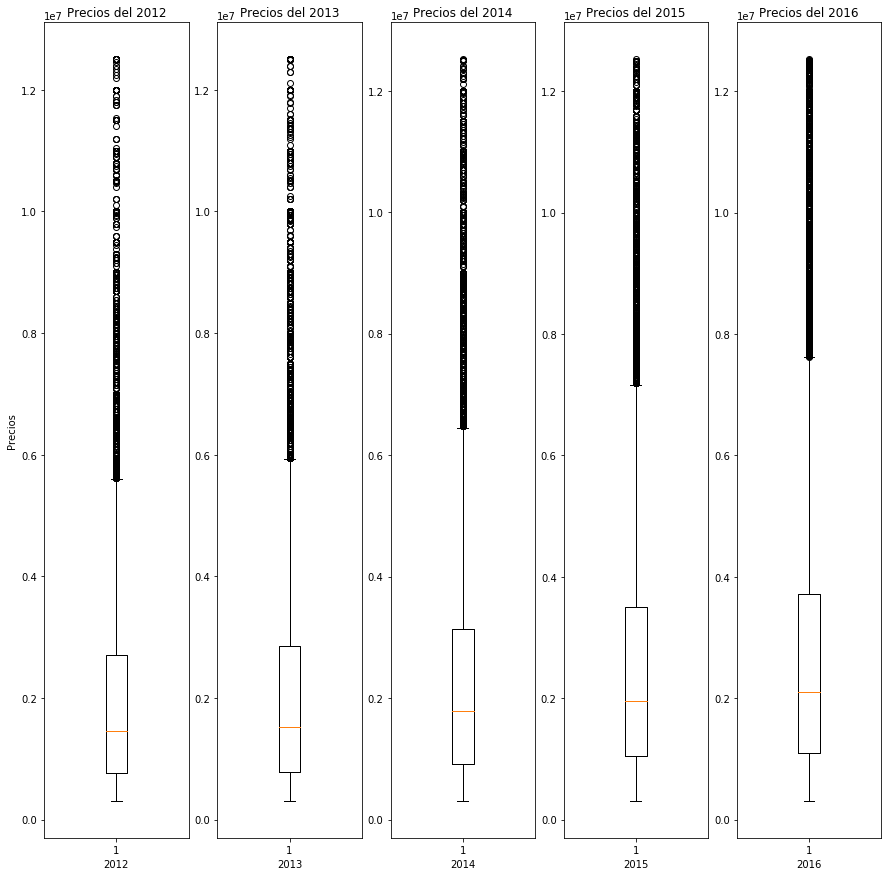

In [11]:
#boxplot(datos=anio_2012['precio'],color='red',titulo='Valores mínimo,máximo y mediana del precio para cada año',etiqueta_x='Años',etiqueta_y='Precio')
#boxplot(datos=anio_2013['precio'],color='red',titulo='Valores mínimo,máximo y mediana del precio para cada año',etiqueta_x='Años',etiqueta_y='Precio')
#boxplot(datos=anio_2014['precio'],color='red',titulo='Valores mínimo,máximo y mediana del precio para cada año',etiqueta_x='Años',etiqueta_y='Precio')
#boxplot(datos=anio_2015['precio'],color='red',titulo='Valores mínimo,máximo y mediana del precio para cada año',etiqueta_x='Años',etiqueta_y='Precio')
#boxplot(datos=anio_2016['precio'],color='red',titulo='Valores mínimo,máximo y mediana del precio para cada año',etiqueta_x='Años',etiqueta_y='Precio')
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
axs[0].boxplot(anio_2012['precio'])
axs[0].set_xlabel('2012')
axs[0].set_ylabel('Precios')
axs[0].set_title('Precios del 2012')

axs[1].boxplot(anio_2013['precio'])
axs[1].set_xlabel('2013')
axs[1].set_title('Precios del 2013')

axs[2].boxplot(anio_2014['precio'])
axs[2].set_xlabel('2014')
axs[2].set_title('Precios del 2014')

axs[3].boxplot(anio_2015['precio'])
axs[3].set_xlabel('2015')
axs[3].set_title('Precios del 2015')


axs[4].boxplot(anio_2016['precio'])
axs[4].set_xlabel('2016')
axs[4].set_title('Precios del 2016')

plt.show()

Observando el gráfico se puede ver que: 
* La cantidad de propiedades en venta crecen a medida que pasan los años
  (esto podría ser causado por la acumulación de propiedades que no se venden en el transcurso del año)
* El valor más bajo que puede tener una propiedad se mantiene constante a lo largo de los años
* El valor más alto que puede tener una propiedad aumenta a lo largo de los años

## Análisis de precio promedio por provincias

In [36]:
precioanualporprovincia=dataframe.groupby(['provincia','anio']).agg({'precio': 'mean'}).sort_values('precio', ascending=False)

In [37]:
precioanualporprovincia

precio
provincia             anio              
Distrito Federal      2016  3.821057e+06
                      2015  3.674320e+06
                      2014  3.222890e+06
Nuevo León            2016  3.129440e+06
Edo. de México        2016  3.110778e+06
Guerrero              2016  3.030141e+06
Distrito Federal      2013  3.028888e+06
Edo. de México        2015  2.969122e+06
Distrito Federal      2012  2.859800e+06
Quintana Roo          2016  2.688815e+06
Tabasco               2016  2.599114e+06
Nuevo León            2015  2.584847e+06
Morelos               2016  2.583591e+06
Jalisco               2016  2.559217e+06
Quintana Roo          2015  2.497598e+06
Puebla                2015  2.496025e+06
Edo. de México        2014  2.482046e+06
Guerrero              2015  2.470716e+06
Tabasco               2015  2.466612e+06
Guerrero              2014  2.464079e+06
Puebla                2016  2.460263e+06
Edo. de México        2013  2.398423e+06
Querétaro             2016  2.392042e+06
Jalisco               2014  2.344541e+06
Morelos               2015  2.307031e+06
                      2014  2.292275e+06
Jalisco               2015  2.258930e+06
Puebla                2014  2.245124e+06
Tabasco               2014  2.233234e+06
San luis Potosí       2016  2.191536e+06
...                                  ...
Baja California Sur   2014  1.303826e+06
Tamaulipas            2015  1.300860e+06
Coahuila              2012  1.291594e+06
Oaxaca                2012  1.284349e+06
Colima                2012  1.278927e+06
                      2014  1.273075e+06
Chihuahua             2012  1.257931e+06
Durango               2015  1.249753e+06
Sonora                2013  1.216323e+06
Colima                2013  1.196084e+06
Zacatecas             2016  1.189424e+06
Campeche              2013  1.183591e+06
Tlaxcala              2016  1.146349e+06
Hidalgo               2014  1.142397e+06
Sonora                2012  1.138470e+06
Hidalgo               2013  1.122051e+06
Durango               2014  1.096408e+06
Hidalgo               2012  1.072574e+06
Durango               2013  1.068767e+06
Baja California Sur   2013  1.059636e+06
Durango               2012  1.016204e+06
Tlaxcala              2012  9.985415e+05
                      2014  9.474714e+05
                      2013  9.258658e+05
Baja California Norte 2012  8.780551e+05
                      2015  7.997956e+05
                      2013  7.877473e+05
                      2016  7.811132e+05
Zacatecas             2015  7.455500e+05
Baja California Norte 2014  6.583090e+05

[160 rows x 1 columns]

In [38]:
dato=precioanualporprovincia.pivot_table(index='provincia',columns='anio',values='precio')
dato

anio,2012,2013,2014,2015,2016
provincia,,,,,
Aguascalientes,1.349595e+06,1.371918e+06,1.325305e+06,1.417304e+06,1.700051e+06
Baja California Norte,8.780551e+05,7.877473e+05,6.583090e+05,7.997956e+05,7.811132e+05
Baja California Sur,1.349645e+06,1.059636e+06,1.303826e+06,1.584619e+06,1.514683e+06
Campeche,1.391152e+06,1.183591e+06,1.895150e+06,1.992472e+06,2.047399e+06
Chiapas,1.639541e+06,1.960993e+06,1.837472e+06,1.895389e+06,2.068755e+06
Chihuahua,1.257931e+06,1.360854e+06,1.914911e+06,1.839344e+06,1.882333e+06
Coahuila,1.291594e+06,1.387813e+06,1.454217e+06,1.502149e+06,1.711562e+06
Colima,1.278927e+06,1.196084e+06,1.273075e+06,1.827887e+06,1.979893e+06
Distrito Federal,2.859800e+06,3.028888e+06,3.222890e+06,3.674320e+06,3.821057e+06


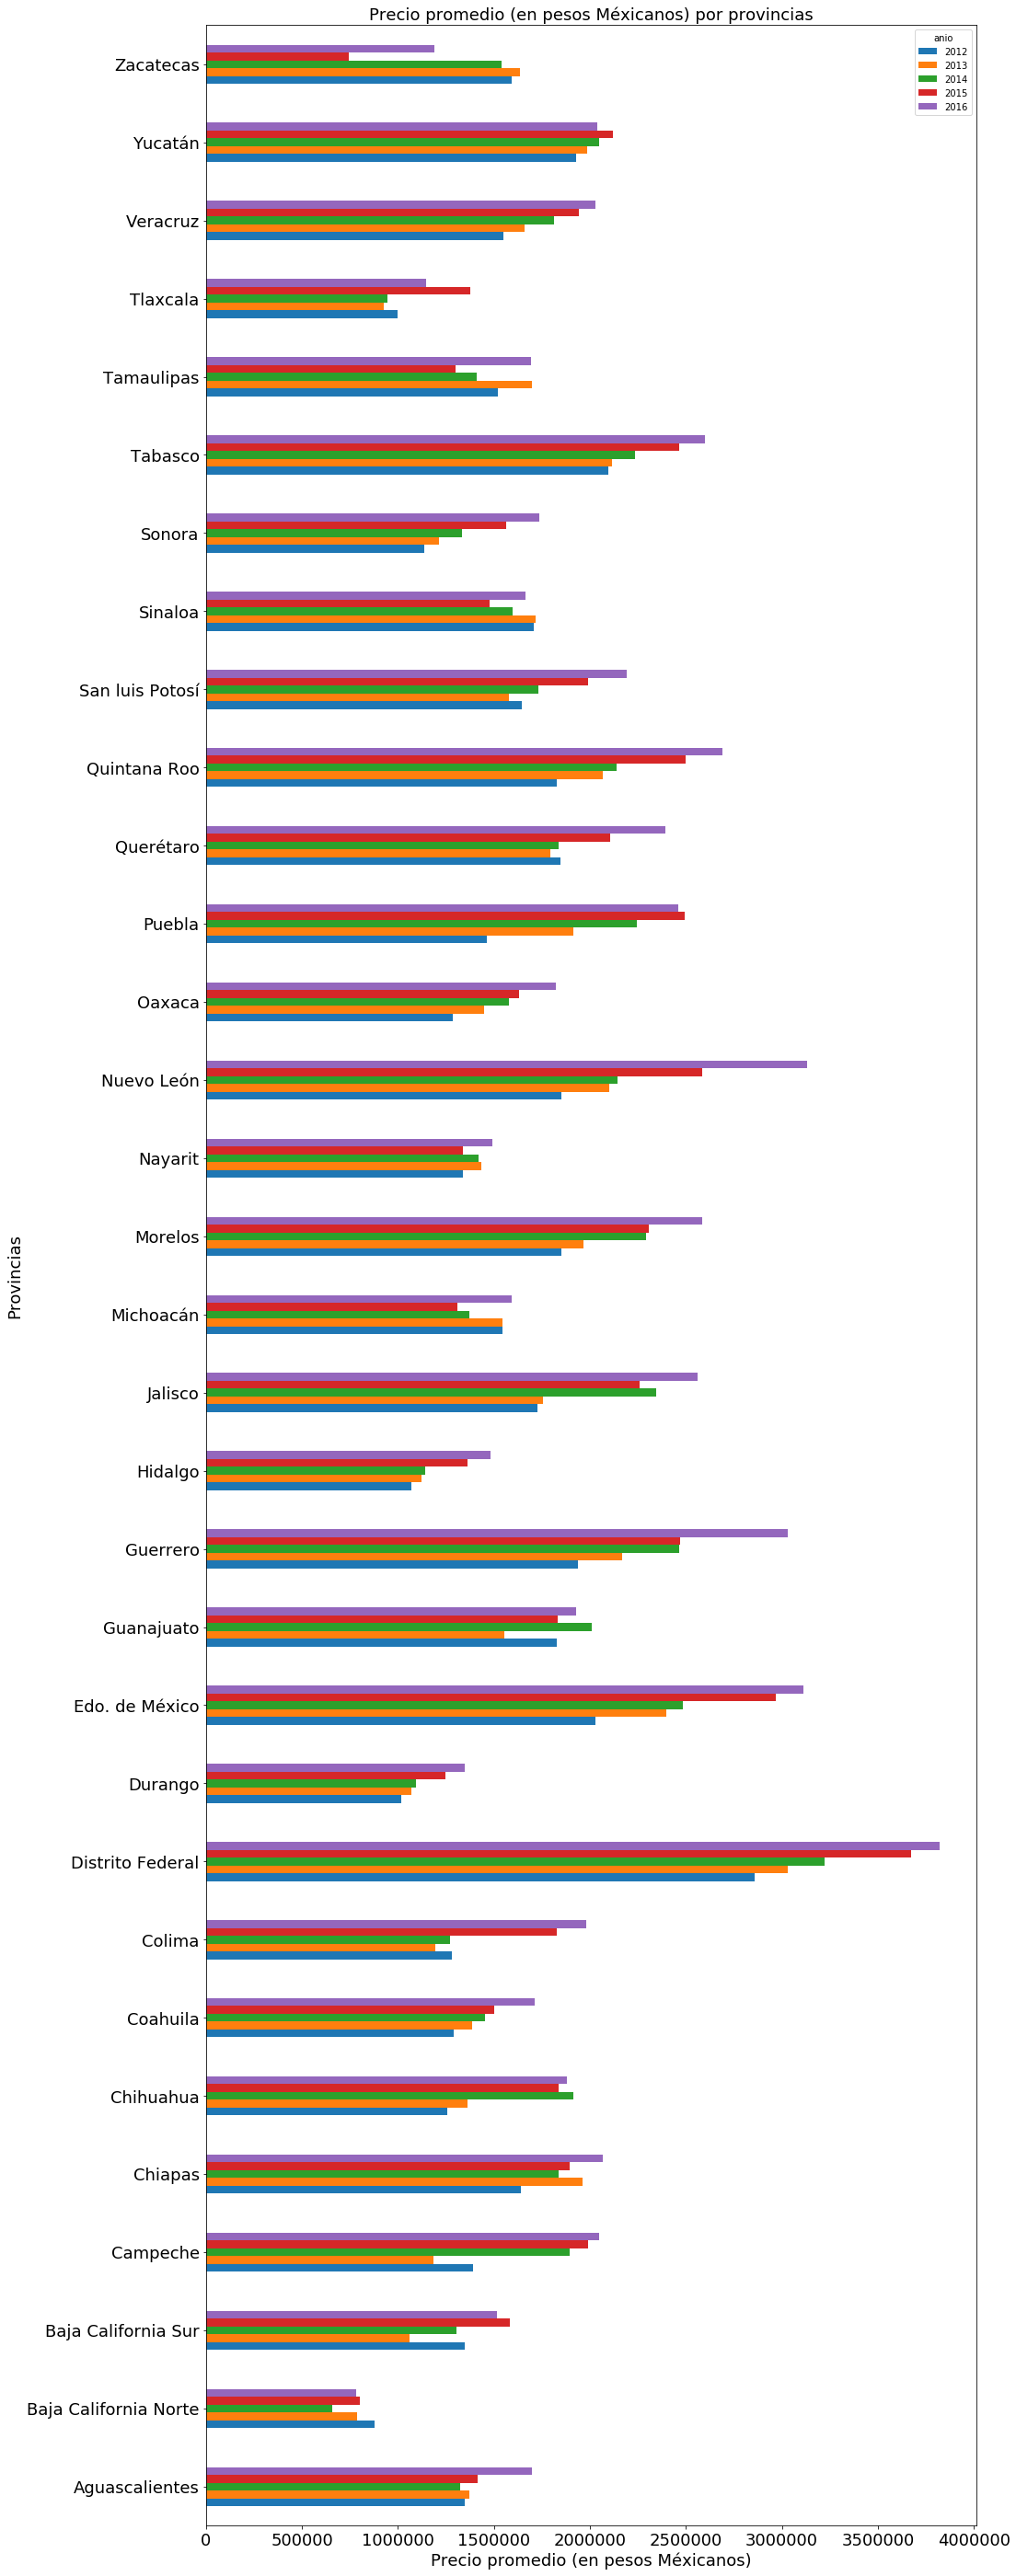

In [39]:
#precioanualporprovincia
#datos=precioanualporprovincia.reset_index(level='anio')
#datos#.iloc[:,['provincia','anio']]#.plot(kind='barh')
hbarplotdf(datos=dato,titulo='Precio promedio (en pesos Méxicanos) por provincias',etiqueta_x='Precio promedio (en pesos Méxicanos)',etiqueta_y='Provincias',tamanio=(15,50))
##plot=dato.plot(kind='barh',figsize=(15,50))#,fontsize=18,color='blue')
##plot.set_title('Precio promedio (en pesos Méxicanos) por provincias',fontSize=18)
##plot.set_ylabel('Provincias',fontSize=18)
##plot.set_xlabel('Precio promedio (en pesos Méxicanos)',fontSize=18)
#plot.margins(x=0.1)
#for index,item in enumerate(plot.patches):
#    plot.text(item.get_width()+.3,item.get_y()+.1,str(dato.iloc[index]),fontsize=15)

Del análisis del gráfico se puede observar que:
* El precio promedio de las propiedades en Zacatecas disminuye significativamente en el año 2015 para luego aumentar significativamente en el año 2016
* El precio promedio de las propiedades en Tlaxcala aumenta significativamente en el año 2015 para luego bajar significativamente en el año 2016
* Haciendo una comparación por años, el precio promedio más alto corresponde, en todos los casos, a las propiedades del Distrito Federal (Las propiedades de México DF en 2012 son las que tienen precio promedio más alto entre todoas las provincias, lo mismo ocurre si solo comparamos las de 2013, las de 2014, las de 2015 y las de 2016)

## Análisis de precio promedio por tipo de propiedad

In [40]:
dato=dataframe.groupby(['tipodepropiedad','anio']).agg({'precio': 'mean'}).pivot_table(index='tipodepropiedad',columns='anio',values='precio')
dato

anio,2012,2013,2014,2015,2016
tipodepropiedad,,,,,
Apartamento,1.895032e+06,2.219235e+06,2.429907e+06,2.965421e+06,3.141786e+06
Bodega comercial,2.204930e+06,2.616785e+06,2.608754e+06,2.818306e+06,2.802626e+06
Casa,2.011125e+06,2.026202e+06,2.287626e+06,2.475347e+06,2.634788e+06
Casa en condominio,2.261724e+06,2.693680e+06,2.775549e+06,2.983437e+06,3.202797e+06
Casa uso de suelo,3.571162e+06,3.311177e+06,3.923782e+06,3.837179e+06,3.829135e+06
Departamento Compartido,9.950000e+05,4.445798e+06,2.090796e+06,2.684435e+06,2.556749e+06
Duplex,NaN,NaN,NaN,1.304519e+06,1.267187e+06
Edificio,4.807669e+06,4.927447e+06,4.676060e+06,4.788692e+06,5.439087e+06
Garage,NaN,NaN,NaN,5.000000e+05,NaN


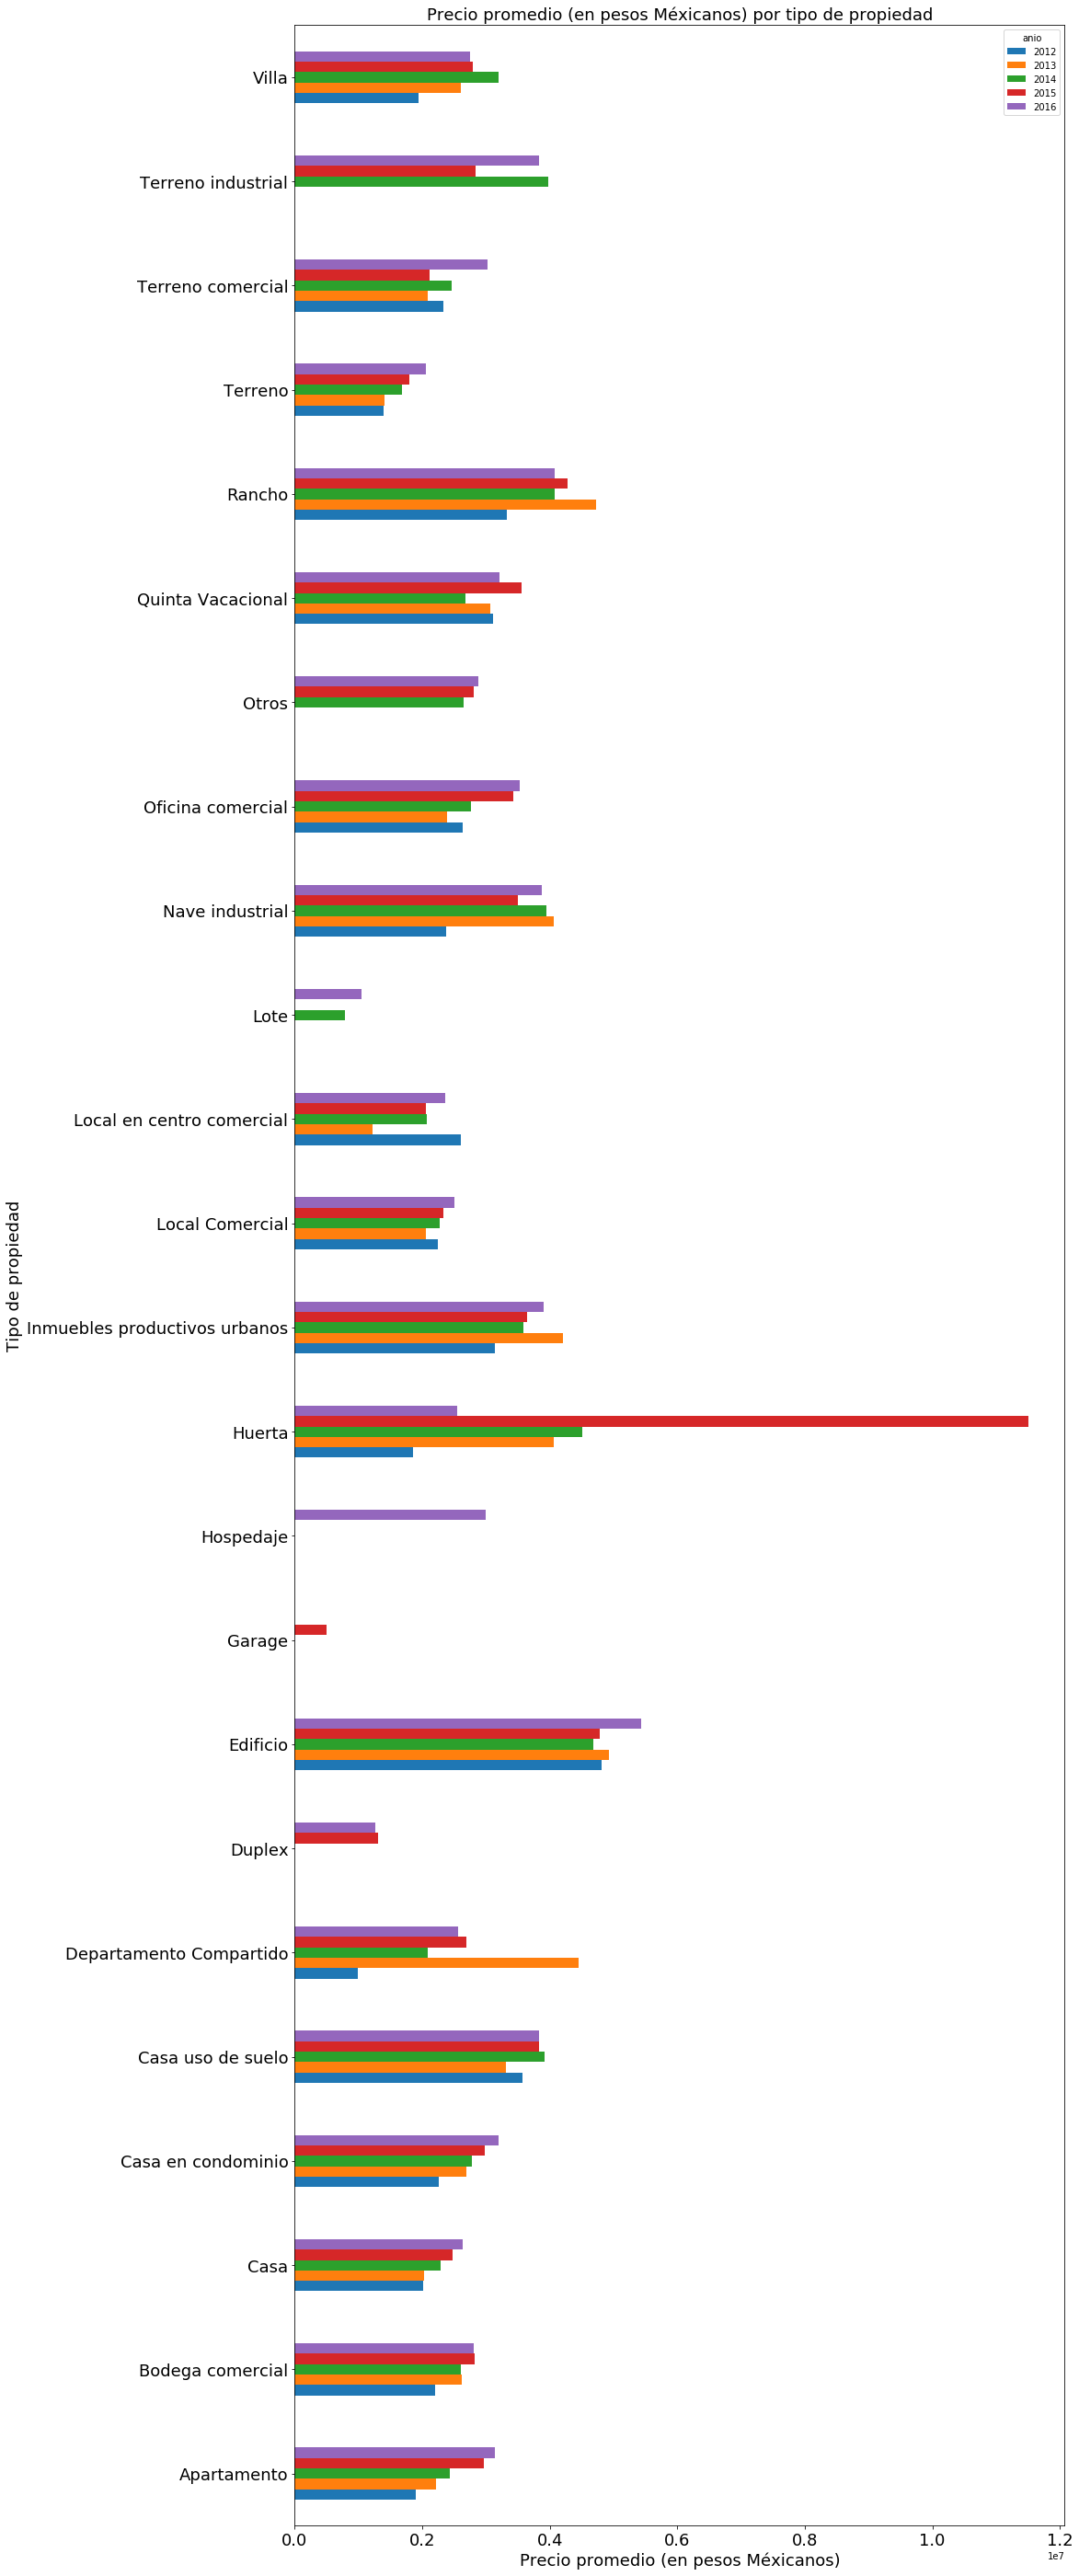

In [41]:
hbarplotdf(datos=dato,titulo='Precio promedio (en pesos Méxicanos) por tipo de propiedad',etiqueta_x='Precio promedio (en pesos Méxicanos)',etiqueta_y='Tipo de propiedad',tamanio=(15,50))


Del análisis del gráfico se puede observar que:
* Hay ciertos tipos de propiedades con precios promedio igual a cero para ciertos años (esto se deba seguramente a valores faltantes para ciertas propiedades en ciertos años)
* El precio promedio de las huertas aumenta significativamente en el año 2015 para luego bajar significativamente en el año 2016
* El precio promedio de los departamentos compartidos aumenta significativamente en el año 2013 para luego bajar significativamente en el año 2014

## Análisis de precio promedio por cantidad de habitaciones

In [42]:
dato=dataframe.groupby(['habitaciones','anio']).agg({'precio': 'mean'}).pivot_table(index='habitaciones',columns='anio',values='precio')
dato

anio,2012,2013,2014,2015,2016
habitaciones,,,,,
1.0,1.303237e+06,1.457965e+06,1.571561e+06,1.908574e+06,2.021207e+06
2.0,1.142163e+06,1.224641e+06,1.443936e+06,1.768443e+06,1.866842e+06
3.0,2.233734e+06,2.352198e+06,2.557738e+06,2.888619e+06,3.064829e+06
4.0,2.927089e+06,3.107255e+06,3.366967e+06,3.565263e+06,3.761642e+06
5.0,2.652972e+06,2.891517e+06,3.072803e+06,3.267101e+06,3.681379e+06
6.0,2.890011e+06,2.980333e+06,3.087733e+06,3.319543e+06,3.259231e+06
7.0,2.875563e+06,2.676288e+06,3.481676e+06,3.782024e+06,3.917687e+06
8.0,2.981645e+06,2.660250e+06,3.173012e+06,3.741158e+06,3.681224e+06
9.0,3.550000e+06,2.824762e+06,4.036176e+06,4.864459e+06,3.820284e+06


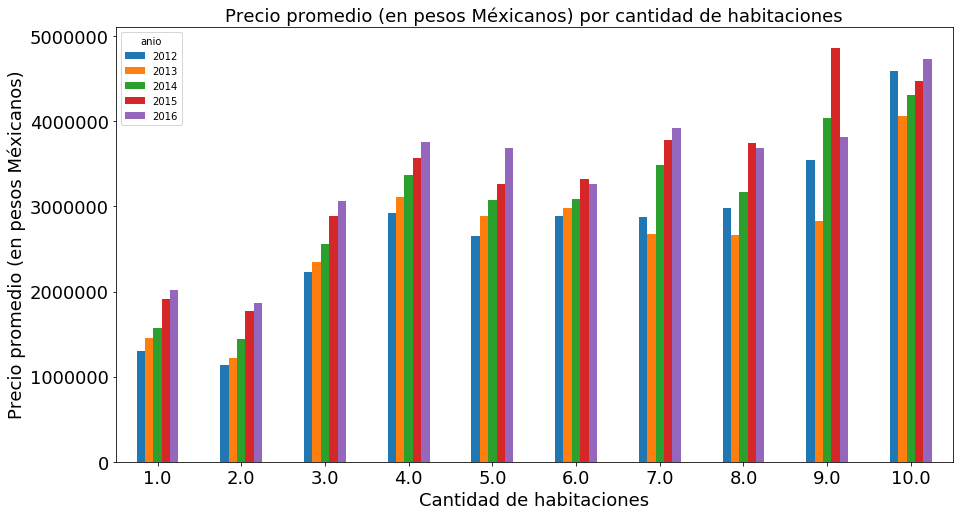

In [43]:
barplotdf(datos=dato,titulo='Precio promedio (en pesos Méxicanos) por cantidad de habitaciones',etiqueta_y='Precio promedio (en pesos Méxicanos)',etiqueta_x='Cantidad de habitaciones',tamanio=(15,8))


Del análisis del gráfico se puede observar que:
* A medida que transcurren los años el precio promedio de las propiedades con 1 a 5 habitaciones aumenta
* El precio promedio de las propiedades con 6 habitaciones aumenta año a año, pero en el año 2016 baja respecto del valor del año 2015 pero se mantiene por arriba del año 2014
* El precio promedio de las propiedades con 7 habitaciones baja en el año 2013, pero después aumenta año a año
* El precio promedio de las propiedades con 8 y 9 habitaciones baja en el año 2013, pero después aumenta año a año. Aunque vuelve a bajar en el año 2016. En el caso de propiedades con 9 habitaciones se destaca una suba muy alta en el año 2015 que luego parece corregirse a valores previos en el año siguiente.
* El precio promedio de las propiedades con 10 habitaciones baja significativamente en el año 2013 pero luego aumenta año a año

## Análisis de precio promedio por cantidad de garages

In [44]:
dato=dataframe.groupby(['garages','anio']).agg({'precio': 'mean'}).pivot_table(index='garages',columns='anio',values='precio')
dato

anio,2012,2013,2014,2015,2016
garages,,,,,
0.0,1.820013e+06,1.826255e+06,1.964086e+06,2.059477e+06,2.225266e+06
1.0,1.049495e+06,1.095120e+06,1.306235e+06,1.418475e+06,1.515236e+06
2.0,2.066895e+06,2.185196e+06,2.434069e+06,2.740783e+06,2.999445e+06
3.0,3.387392e+06,3.632033e+06,3.966578e+06,4.545360e+06,4.763672e+06


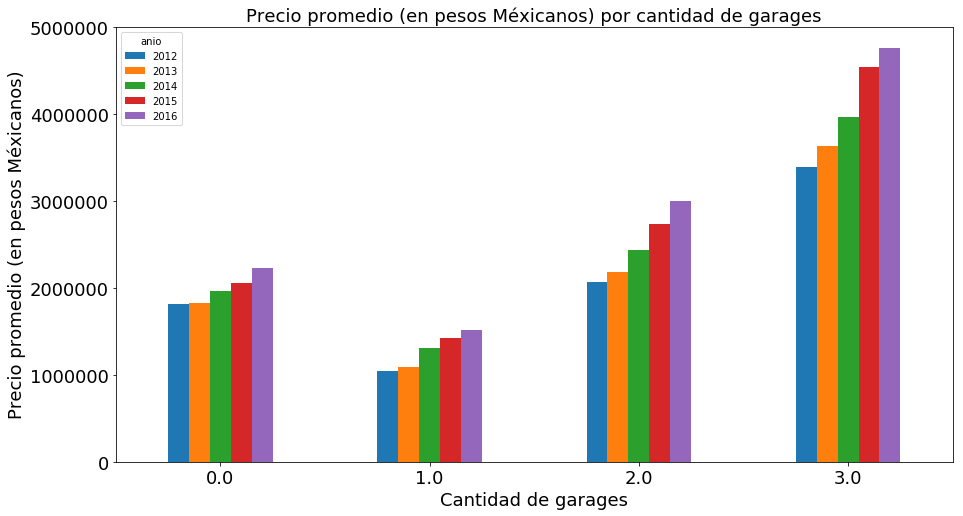

In [45]:
barplotdf(datos=dato,titulo='Precio promedio (en pesos Méxicanos) por cantidad de garages',etiqueta_y='Precio promedio (en pesos Méxicanos)',etiqueta_x='Cantidad de garages',tamanio=(15,8))


Del análisis del gráfico se puede observar que:
* Que el precio promedio de la propiedades sin garage es mayor al de las que tienen 1 garage (esto se cumple para todos los años)
* Que el precio promedio de las propiedades sin garage es menor al de las propiedades con 2 garages, que a su vez es menor al precio promedio de las propiedades con 3 garages
* Que a medida que transcurren los años el precio promedio de las propiedades aumenta ya sea que tengan 0,1,2 o 3 garages (una posible explicación de esto podría ser la inflación de la moneda Méxicana)

## Análisis de precio promedio por cantidad de baños

In [46]:
dato=dataframe.groupby(['banos','anio']).agg({'precio': 'mean'}).pivot_table(index='banos',columns='anio',values='precio')
dato

anio,2012,2013,2014,2015,2016
banos,,,,,
1.0,8.176862e+05,8.622423e+05,1.010227e+06,1.105495e+06,1.161254e+06
2.0,1.875017e+06,1.975957e+06,2.140369e+06,2.397025e+06,2.574190e+06
3.0,3.179731e+06,3.391847e+06,3.443145e+06,3.809577e+06,3.951804e+06
4.0,3.840742e+06,4.103021e+06,4.209173e+06,4.497657e+06,4.714358e+06


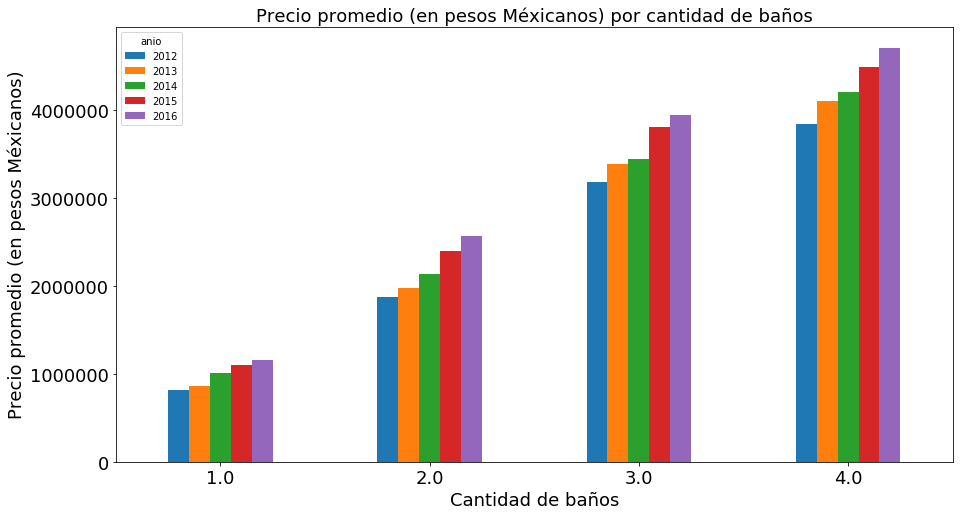

In [47]:
barplotdf(datos=dato,titulo='Precio promedio (en pesos Méxicanos) por cantidad de baños',etiqueta_y='Precio promedio (en pesos Méxicanos)',etiqueta_x='Cantidad de baños',tamanio=(15,8))


Del análisis del gráfico se puede observar que:
* Que se cumple para todos los años (de los que se tienen datos) cuantos más baños tiene una propiedad más cara resulta en promedio
* Que a medida que transcurren los años el precio promedio de las propiedades aumenta ya sea que tengan 1,2,3 o 4 baños (una posible explicación de esto podría ser la inflación de la moneda Méxicana)